# Import the required libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product

# Read the crime data csv file

In [1]:
from google.colab import files
upload=files.upload()

Saving daily crime numbers and weather data for time series analysis.csv to daily crime numbers and weather data for time series analysis.csv


# Explore the crime data

In [11]:
data = pd.read_csv('/content/daily crime numbers and weather data for time series analysis.csv')
data.head()

,date,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2010-01-01,0,13,31,58,0,0,77,215,21,...,174.8,15.0,7.0,07:16:59,17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
1,2010-01-02,0,2,32,15,0,0,67,200,28,...,86.5,7.4,4.0,07:11:23,17:59:08,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
2,2010-01-03,0,0,38,35,0,0,52,179,35,...,179.6,15.5,8.0,06:47:10,18:20:48,0.53,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
3,2010-01-04,0,1,24,25,0,0,94,211,29,...,296.8,25.9,10.0,07:10:50,19:40:10,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
4,2010-01-05,0,3,19,22,0,0,88,183,20,...,307.1,26.5,10.0,06:38:56,19:58:34,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."


In [48]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4960 entries, 2010-01-01 to 2023-07-31
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Kidnapping/Abduction                       4960 non-null   int64  
 1   Sex Offenses, Forcible                     4960 non-null   int64  
 2   Robbery                                    4960 non-null   int64  
 3   Assault Offenses                           4960 non-null   int64  
 4   Arson                                      4960 non-null   int64  
 5   Extortion/Blackmail                        4960 non-null   int64  
 6   Burglary/Breaking & Entering               4960 non-null   int64  
 7   Larceny/Theft Offenses                     4960 non-null   int64  
 8   Motor Vehicle Theft                        4960 non-null   int64  
 9   Counterfeiting/Forgery                     4960 non-null   int64  
 10  Fraud 

(4960, 73)

# Split the data into Train and Test sets

In [16]:
# Define the date for splitting data into train and test sets
split_date = '2022-01-01'

# Create training and testing datasets
train_data = data[data['date'] < split_date]
test_data = data[data['date'] >= split_date]


# Fit the SARIMA model to the Train set

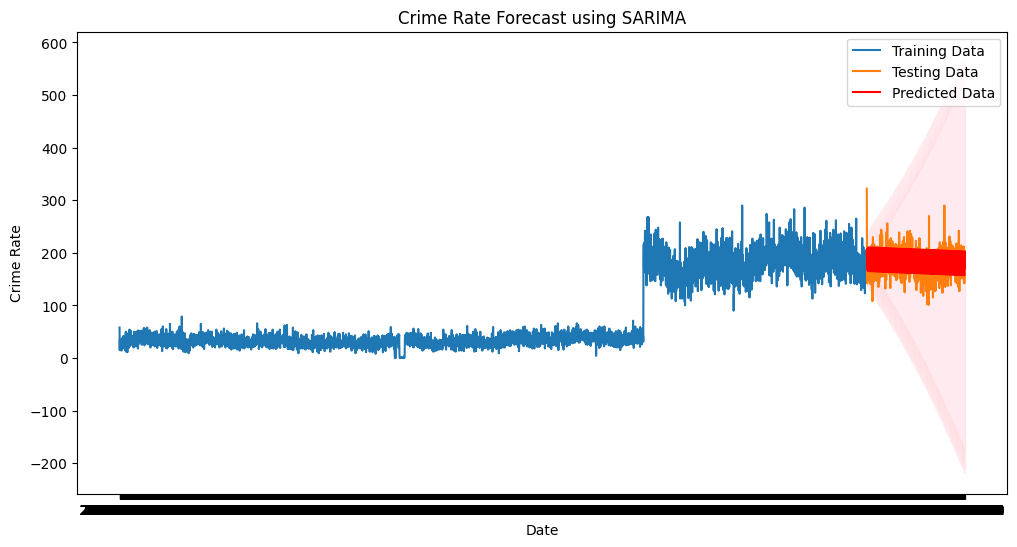

In [17]:
# Define the target variable (daily crime rate)
target = 'Assault Offenses'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data[target], label='Training Data')
plt.plot(test_data['date'], test_data[target], label='Testing Data')
plt.plot(test_data['date'], predicted_values, label='Predicted Data', color='red')

# Add confidence intervals
plt.fill_between(test_data['date'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Forecast using SARIMA')
plt.legend()
plt.show()

* The crime rate forcast plot above shows that the SARIMA model is able to accurately predict the crime rate.
* The plot also shows that the crime rate is increasing over time, which is a concerning trend.
* It is important to take steps to address the increase in crime rate. Some possible solutions include increasing the number of law enforcement officers in the area, or installing security cameras in strategic locations.

# Make predictions on the test set and evaluate the model

In [18]:

# Calculate model predictions on the test data
test_predictions = forecast.predicted_mean

# Calculate evaluation metrics
mae = mean_absolute_error(test_data[target], test_predictions)
mse = mean_squared_error(test_data[target], test_predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 17.40
Mean Squared Error (MSE): 515.74
Root Mean Squared Error (RMSE): 22.71


# Find the best SARIMA Hyperparameters

In [19]:

# Define lists of potential values for order and seasonal_order
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(product(p, d, q))]

best_mae = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data[target], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data))
            predicted_values = forecast.predicted_mean
            mae = mean_absolute_error(test_data[target], predicted_values)

            if mae < best_mae:
                best_mae = mae
                best_params = (param, param_seasonal)
        except:
            continue

print(f"Best MAE: {best_mae:.2f}")
print(f"Best SARIMA Parameters: {best_params}")


Best MAE: 17.40
Best SARIMA Parameters: ((1, 1, 1), (1, 1, 1, 7))


# Make Future Predictions using the best SARIMA model

SARIMA is a suitable model for handling time series data with seasonality and trend components that is often used to predict future values based on past data.

Besides SARIMA, several other time series forecasting models can be considered, depending on the specific characteristics of your crime rate data. Here are some alternative models to consider:

* Autoregressive Integrated Moving Average (ARIMA)
* Prophet
* Long Short-Term Memory (LSTM)
* Random Forests or Gradient Boosting



In [24]:
# Define the number of days into the future you want to predict
forecast_horizon = 30  # You can adjust this value

# Find the latest date in the dataset and convert it to a datetime object
latest_date_str = data['date'].max()
latest_date = datetime.strptime(latest_date_str, '%Y-%m-%d')

# Create a list of future dates
future_dates = [latest_date + timedelta(days=i) for i in range(1, forecast_horizon + 1)]

# Fit the SARIMA model on the entire dataset (including the test data)
final_model = SARIMAX(data[target], order=best_params[0], seasonal_order=best_params[1])
final_results = final_model.fit()

# Forecast future values
future_forecast = final_results.get_forecast(steps=forecast_horizon)
future_predictions = future_forecast.predicted_mean

# Print future dates and predictions
print("Future Predictions:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Prediction: {prediction:.2f}")


Future Predictions:
Date: 2023-08-01, Prediction: 161.82
Date: 2023-08-02, Prediction: 162.80
Date: 2023-08-03, Prediction: 155.21
Date: 2023-08-04, Prediction: 166.54
Date: 2023-08-05, Prediction: 190.88
Date: 2023-08-06, Prediction: 202.53
Date: 2023-08-07, Prediction: 170.53
Date: 2023-08-08, Prediction: 162.27
Date: 2023-08-09, Prediction: 161.91
Date: 2023-08-10, Prediction: 155.82
Date: 2023-08-11, Prediction: 166.92
Date: 2023-08-12, Prediction: 190.11
Date: 2023-08-13, Prediction: 202.58
Date: 2023-08-14, Prediction: 170.32
Date: 2023-08-15, Prediction: 162.21
Date: 2023-08-16, Prediction: 161.79
Date: 2023-08-17, Prediction: 155.77
Date: 2023-08-18, Prediction: 166.85
Date: 2023-08-19, Prediction: 189.98
Date: 2023-08-20, Prediction: 202.50
Date: 2023-08-21, Prediction: 170.22
Date: 2023-08-22, Prediction: 162.13
Date: 2023-08-23, Prediction: 161.70
Date: 2023-08-24, Prediction: 155.69
Date: 2023-08-25, Prediction: 166.77
Date: 2023-08-26, Prediction: 189.89
Date: 2023-08-27, 

# Plot the Actual and Predicted crime rates

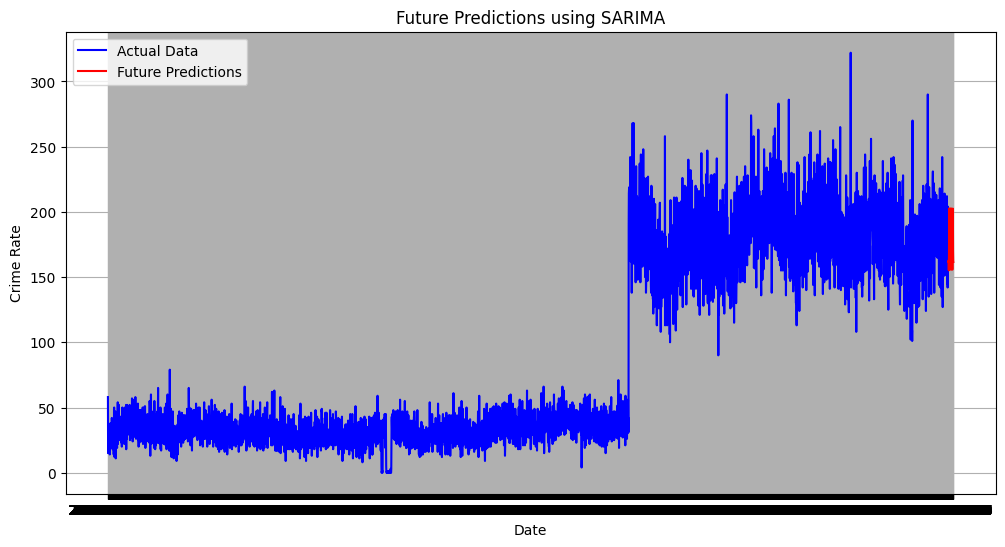

In [31]:
# Convert future dates to a list of strings
future_date_strings = [date.strftime('%Y-%m-%d') for date in future_dates]

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[target], label='Actual Data', color='blue')

# Plot the future predictions
plt.plot(future_date_strings, future_predictions, label='Future Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Future Predictions using SARIMA')
plt.legend()
plt.grid(True)
#plt.xticks(rotation=90, size = 4)  # Rotate x-axis labels for better visibility
plt.show()


# Monthly and Weekly crime forecast

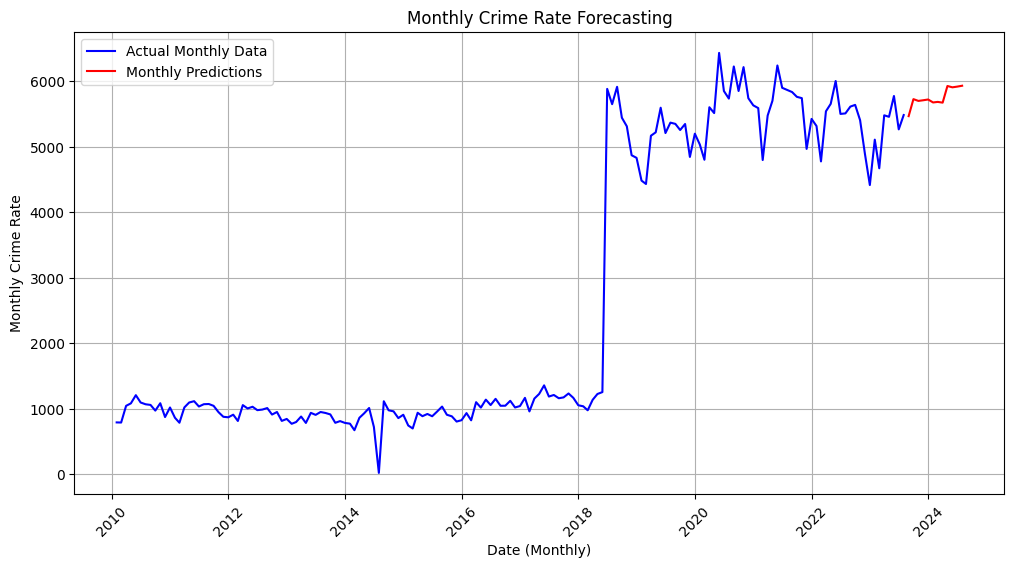

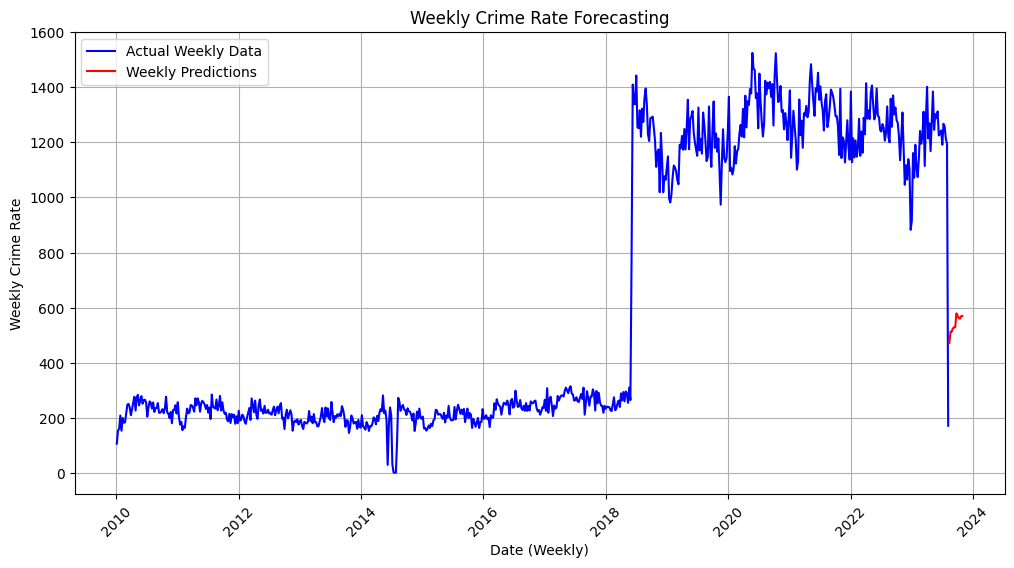

In [46]:
# Convert 'date' column to a datetime index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to monthly frequency
monthly_data = data[target].resample('M').sum()

# Resample the data to weekly frequency
weekly_data = data[target].resample('W').sum()

# Define the forecast horizon
forecast_horizon = 12  # Number of months or weeks into the future

# Create future dates for monthly and weekly forecasts
future_dates_monthly = pd.date_range(start=monthly_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
future_dates_weekly = pd.date_range(start=weekly_data.index[-1], periods=forecast_horizon + 1, freq='W')[1:]

# Fit the SARIMA model on the entire dataset (including the test data)
final_model_monthly = SARIMAX(monthly_data, order=best_params[0], seasonal_order=best_params[1])
final_results_monthly = final_model_monthly.fit()

final_model_weekly = SARIMAX(weekly_data, order=best_params[0], seasonal_order=best_params[1])
final_results_weekly = final_model_weekly.fit()

# Forecast future values for monthly and weekly data
future_forecast_monthly = final_results_monthly.get_forecast(steps=forecast_horizon)
future_predictions_monthly = future_forecast_monthly.predicted_mean

future_forecast_weekly = final_results_weekly.get_forecast(steps=forecast_horizon)
future_predictions_weekly = future_forecast_weekly.predicted_mean

# Plot monthly actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values, label='Actual Monthly Data', color='blue')
plt.plot(future_dates_monthly, future_predictions_monthly, label='Monthly Predictions', color='red')

plt.xlabel('Date (Monthly)')
plt.ylabel('Monthly Crime Rate')
plt.title('Monthly Crime Rate Forecasting')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot weekly actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, label='Actual Weekly Data', color='blue')
plt.plot(future_dates_weekly, future_predictions_weekly, label='Weekly Predictions', color='red')

plt.xlabel('Date (Weekly)')
plt.ylabel('Weekly Crime Rate')
plt.title('Weekly Crime Rate Forecasting')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

